# From dirty data (right after scraping)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from bs4.element import Tag

In [8]:
import nbimporter

In [9]:
from scraper_data_reader import ReaderScrapedData

In [10]:
data = ReaderScrapedData.read_data("scraper_configs.json")

counter = 0
for website in data:
    counter += sum([len(data[website][dom]) for dom in data[website]])
print("Read {0} articles".format(counter))

Read 3191 articles


## Number of scraped tutorials per website

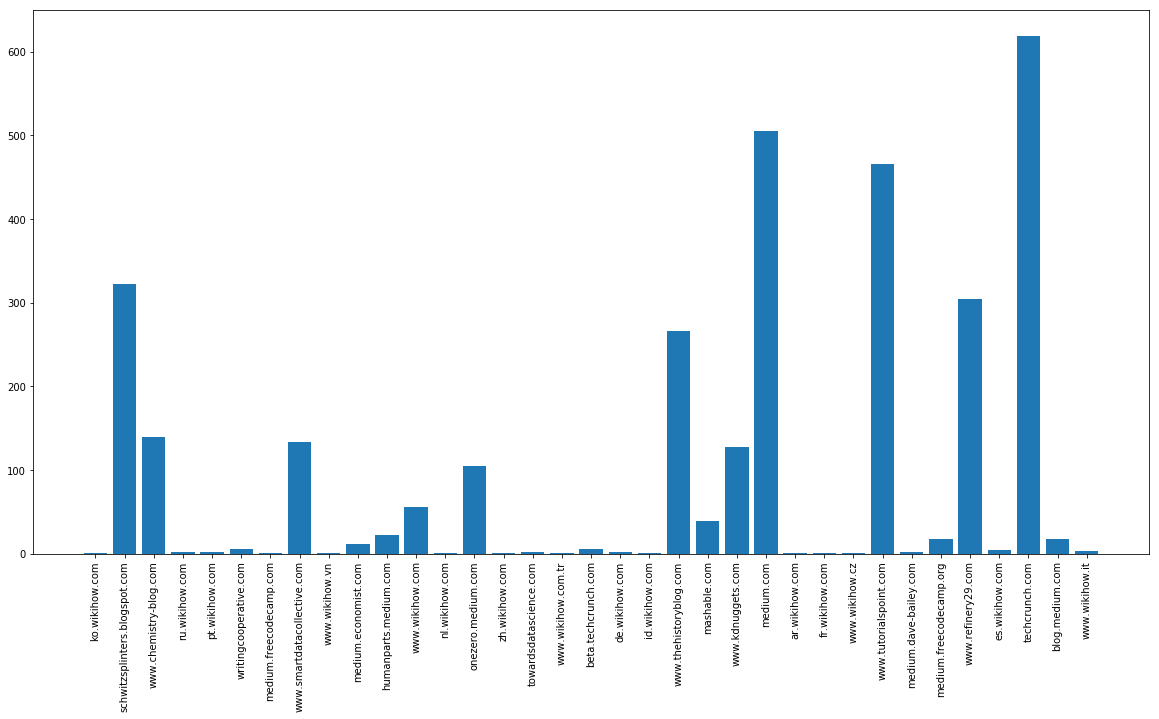

In [11]:
data_plt = {}
for k,v in data.items():
    for k2,v2 in v.items():
        data_plt[k2.split("/")[-1]] = len(v2)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(data_plt)), list(data_plt.values()), align='center')
plt.xticks(range(len(data_plt)), list(data_plt.keys()), rotation=90)

plt.show()

## Average lenght of html per website

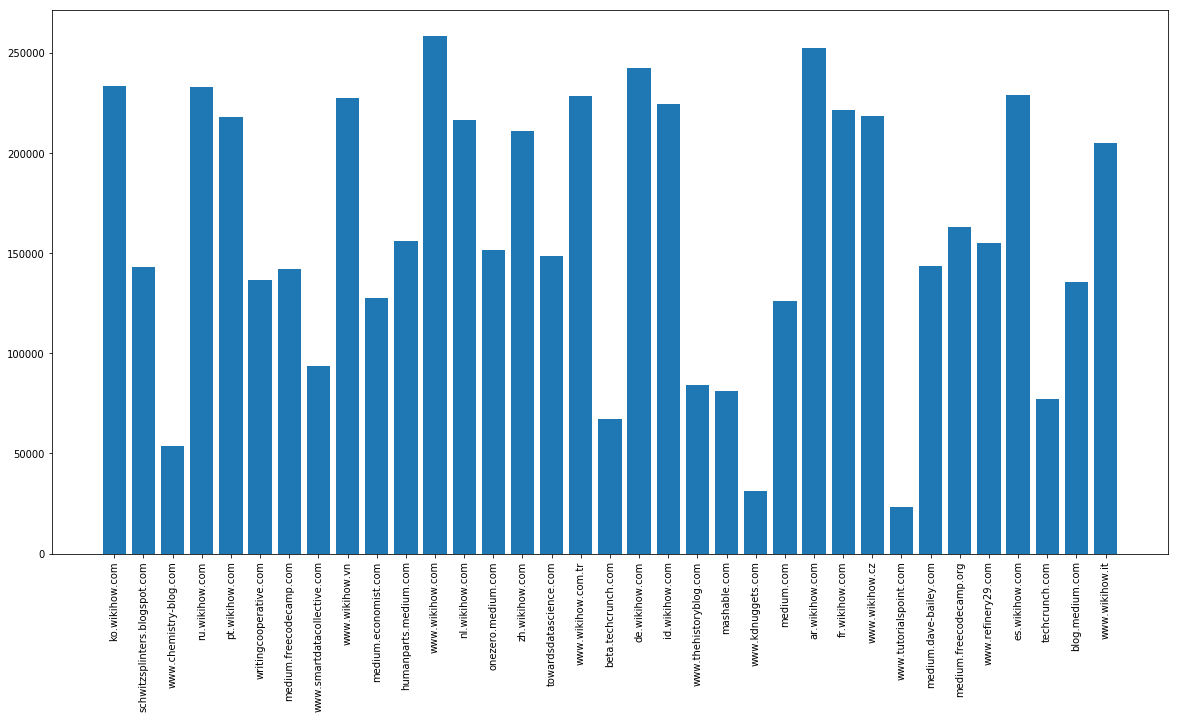

In [12]:
data_plt = {}
for k,v in data.items():
    for k2,v2 in v.items():
        data_plt[k2.split("/")[-1]] = sum([len(j["html"]) for j in v2]) / len(v2)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(data_plt)), list(data_plt.values()), align='center')
plt.xticks(range(len(data_plt)), list(data_plt.keys()), rotation=90)

plt.show()

## Average title length per website

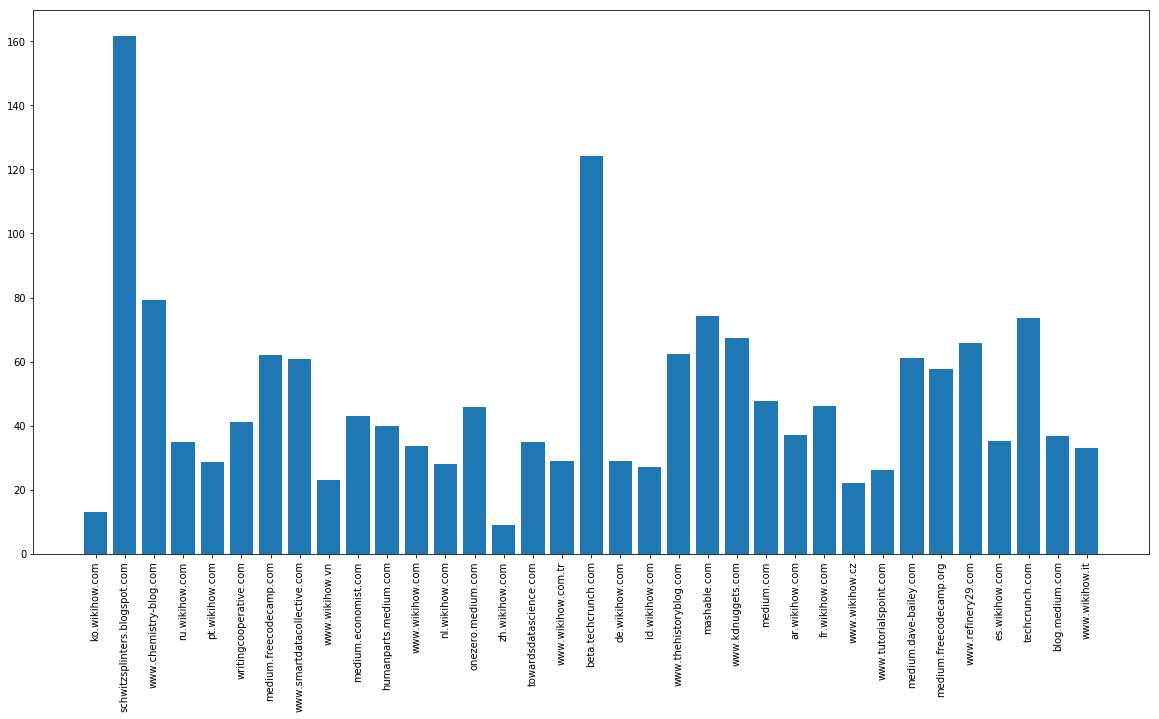

In [13]:
data_plt = {}
for k,v in data.items():
    for k2,v2 in v.items():
        data_plt[k2.split("/")[-1]] = sum([len(j["title"]) for j in v2]) / len(v2)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(data_plt)), list(data_plt.values()), align='center')
plt.xticks(range(len(data_plt)), list(data_plt.keys()), rotation=90)

plt.show()

### Average number of words in titles per website

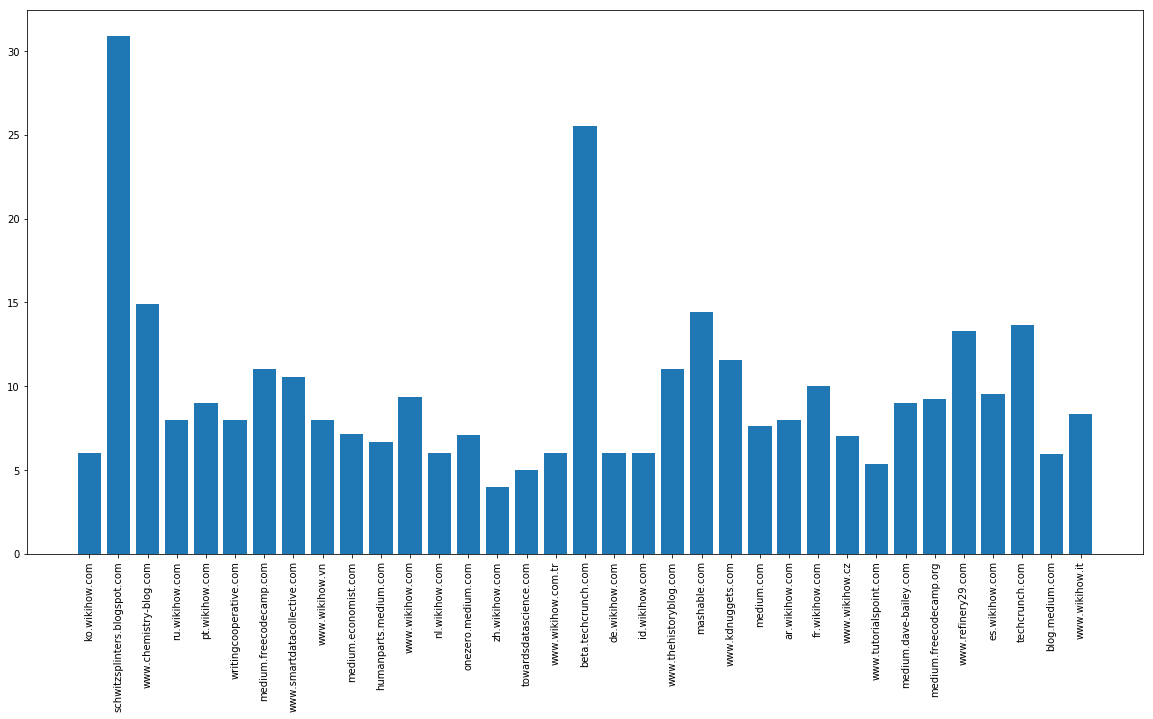

In [14]:
data_plt = {}
for k,v in data.items():
    for k2,v2 in v.items():
        data_plt[k2.split("/")[-1]] = sum([len(j["title"].split(" ")) for j in v2]) / len(v2)

fig = plt.figure(figsize=(20,10))
plt.bar(range(len(data_plt)), list(data_plt.values()), align='center')
plt.xticks(range(len(data_plt)), list(data_plt.keys()), rotation=90)

plt.show()

## Sample titles

In [9]:
import random

In [10]:
for k1,v1 in data.items():
    for k2,v2 in v1.items():
        random_selected = np.random.choice(v2, size=5, replace=True)
        titles_and_urls = [(el["title"], el["url"]) for el in random_selected]
        print(k2 + ":")
        for t,u in titles_and_urls:
            print(t + " --> " + u)
        print("---------")

../articles/splinters/schwitzsplinters.blogspot.com:

Percentage of Female Faculty at Elite U.S. Philosophy Departments, 1930-1979
 --> https://schwitzsplinters.blogspot.com/2016/05

The Paradox of the Preface
 --> https://schwitzsplinters.blogspot.com/2006/07

 Gaze of Robot, Gaze of Bird  
  
 Journey 2 Psychology  
  
 New Podcast Interview: How Little Thou Can Know Thyself  
  
 Writings of 2018  
  
 New Experimental Philosophy Blog, and A New Study of Philosophers That Is Looking for Participants  
  
 New Book Forthcoming: Jerks, Zombie Robots, and Other Philosophical Misadventures  
  
 Rebecca Kukla on Diversifying Philosophy  
  
 On What We Tell Pollsters  
  
 My New Book in Draft  
  
 "What Is It Like" Interview Now Freely Available  
  
 What Is It Like Interview  
  
 Please Rate My Blog Posts for Inclusion in My Next Book  
  
 Help Me Choose Posts for My Next Book: Consciousness  
  
 Help Me Choose Posts for My Next Book: Culture and Humor  
  
 Help Me Choose Posts 

## Sample contents

In [11]:
for k1,v1 in data.items():
    for k2,v2 in v1.items():
        random_selected = np.random.choice(v2, size=1, replace=True)
        titles_and_urls = [(el["content"], el["url"]) for el in random_selected]
        print(k2 + ":")
        for t,u in titles_and_urls:
            print(t + " --> " + u)
        print("---------")

../articles/splinters/schwitzsplinters.blogspot.com:

 Like many (most?) 21st-century North Americans, I hate to be told I’ve done something ableist (or racist, or sexist).  Why does it sting so much, and how should I think about such a charge, when it is leveled against me?

Short answer: It stings so much because it’s usually partly,  if only partly, true—and partly true criticisms are the ones that sting worst.  And the best reaction to the charge is, usually, to recognize its partial, if only partial, truth.

First, let’s remind ourselves of a quote from the great Confucius:
How fortunate I am! If I happen to make a mistake, others are sure to inform me. --> https://schwitzsplinters.blogspot.com/2017/03
---------
../articles/chemistry-blog/www.chemistry-blog.com:

 There’s an  article   in the current issue of Nature Chemistry that discusses some alternative ways of depicting the periodicity of the elements.  There’s the IUPAC recognized Mendeleevian periodic table that everyone kn

## Sample article HTML tag chains

In [12]:
for k1,v1 in data.items():
    for k2,v2 in v1.items():
        random_selected = np.random.choice(v2, size=5, replace=True)
        chtml_and_urls = [(el["content_html"], el["url"]) for el in random_selected]
        print(k2 + ":")
        for chtml,u in chtml_and_urls:
            soup = BeautifulSoup(chtml)
            chain = list(list(soup.select("body")[0].descendants)[0].descendants)
            chain_list = []
            for el in chain:
                if type(el) == Tag:
                    chain_list.append(el.name)
            print(" ".join(chain_list) + " ---> " + u)
        print("---------")

../articles/splinters/schwitzsplinters.blogspot.com:
p p a p blockquote p blockquote p a a a p p a p a p blockquote div ---> https://schwitzsplinters.blogspot.com/2006/05/is-conscious-experience-rich-or-thin.html
p a a p a a p b p blockquote p p p p i i i p a a a a blockquote p b i b i i a b p p p a a div ---> https://schwitzsplinters.blogspot.com/2013/03
p a a a br br br br br br br br br br br br div ---> https://schwitzsplinters.blogspot.com/2006/04
p a br br a strong a em br br br br em em br br blockquote br br br br br br em br br br br br br a del div ---> https://schwitzsplinters.blogspot.com/2010/05
p a a br br br br br div ---> http://schwitzsplinters.blogspot.com/search/label/Joshua%20Rust
---------
../articles/chemistry-blog/www.chemistry-blog.com:
p a script br a script br a p a img script p a p script div div ---> http://www.chemistry-blog.com/2016/12/03/the-underground-map-of-the-elements-now-with-nh-mc-ts-og
p p a img p a a p a a p p p a p p a p p p div div ---> http://